In [5]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import os
import matplotlib.pyplot as plt

In [6]:
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
# import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [7]:
batch_size = 32
num_classes = 2
epochs = 100
data_augmentation = True
num_predictions = 2
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_test_wan.h5'

In [8]:
imHog_list = []
im_flt = []

with open(r'C:\Users\ww6848\Documents\Springboard\capstone project 2\title.txt') as f:
    nn = f.readlines()
    names = [x.strip() for x in nn] 

num = 0    
for name in names:
    img = cv2.imread(r'C:\Users\ww6848\Documents\Springboard\capstone project 2\natural_images\test\\'+name)
    #wwww = r'C:\Users\ww6848\Documents\Springboard\capstone project 2\natural_images\airplane\\'+name


    fd = img.flatten()
    im_flt.append(fd)
    imHog_list.append(img)
    num = num + 1

len(names)

200

In [9]:
label_array = np.zeros((len(names),1))
with open(r'C:\Users\ww6848\Documents\Springboard\capstone project 2\value.txt') as f:
    vals = f.readlines()
    vals = [x.strip() for x in vals] 
k = 0 
for val in vals:
    label_array[k,0] = val
    k = k+1
   
im_array = np.asarray(imHog_list)
im_flt_arr = np.asarray(im_flt)


In [10]:
# assign variables to X and y
Xraw = im_array
yraw = label_array

x_train, x_test, y_train, y_test = train_test_split(Xraw, yraw, test_size=0.3, random_state=42)
print('y_train shape:', y_train.shape)
print('x_train shape:', x_train.shape)
print('Xraw shape:', Xraw.shape)
print('yraw shape:', yraw.shape)

y_train shape: (140, 1)
x_train shape: (140, 100, 100, 3)
Xraw shape: (200, 100, 100, 3)
yraw shape: (200, 1)


In [11]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

y_train shape: (140, 2)
y_test shape: (60, 2)


In [12]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# model.add(Conv2D(32, (3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# #########add a new layer####################
# model.add(Conv2D(64, (3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
#######################################################

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [14]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# x_train /= 255
# x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    hist = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch=int(np.ceil(x_train.shape[0] / float(batch_size))),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)
    print(hist.history)

Using real-time data augmentation.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
5/5 [==============================] - 11s 2s/step - loss: 8.3041 - acc: 0.4634 - val_loss: 6.7849 - val_acc: 0.5667
Epoch 2/100
5/5 [==============================] - 7s 1s/step - loss: 6.8860 - acc: 0.5622 - val_loss: 8.0221 - val_acc: 0.5000
Epoch 3/100
5/5 [==============================] - 7s 1s/step - loss: 7.4031 - acc: 0.5274 - val_loss: 3.8605 - val_acc: 0.7333
Epoch 4/100
5/5 [==============================] - 7s 1s/step - loss: 4.1261 - acc: 0.7285 - val_loss: 3.3815 - val_acc: 0.7833
Epoch 5/100
5/5 [==============================] - 7s 1s/step - loss: 3.8518 - acc: 0.7203 - val_loss: 3.1648 - val_acc: 0.7667
Epoch 6/100
5/5 [==============================] - 7s 1s/step - loss: 3.3596 - acc: 0.7824 - val_loss: 0.3789 - val_acc: 0.9667
Epoch 7/100
5/5 [==============================] - 7s 1s/step - loss: 2.6068 - acc: 0.8272 - val_loss: 3.5059 - val_acc: 0.7667
Epoch 8/100
5/5 [===

Epoch 61/100
5/5 [==============================] - 7s 1s/step - loss: 2.1952 - acc: 0.8611 - val_loss: 1.1607 - val_acc: 0.9167
Epoch 62/100
5/5 [==============================] - 7s 1s/step - loss: 1.5231 - acc: 0.9040 - val_loss: 0.2211 - val_acc: 0.9833
Epoch 63/100
5/5 [==============================] - 7s 1s/step - loss: 1.4807 - acc: 0.9081 - val_loss: 0.2211 - val_acc: 0.9833
Epoch 64/100
5/5 [==============================] - 6s 1s/step - loss: 1.4145 - acc: 0.9123 - val_loss: 0.0295 - val_acc: 0.9833
Epoch 65/100
5/5 [==============================] - 6s 1s/step - loss: 1.0622 - acc: 0.9337 - val_loss: 0.2686 - val_acc: 0.9833
Epoch 66/100
5/5 [==============================] - 7s 1s/step - loss: 1.1168 - acc: 0.9187 - val_loss: 0.2686 - val_acc: 0.9833
Epoch 67/100
5/5 [==============================] - 6s 1s/step - loss: 1.2536 - acc: 0.9145 - val_loss: 0.1777 - val_acc: 0.9833
Epoch 68/100
5/5 [==============================] - 7s 1s/step - loss: 1.2744 - acc: 0.9209 - val

In [15]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Saved trained model at C:\Users\ww6848\Documents\Springboard\capstone project 2\saved_models\keras_test_wan.h5 
60/60 [==============================] - 1s 11ms/step
Test loss: 0.2686484182069156
Test accuracy: 0.9833333412806193


In [16]:
y_pred_classes = model.predict_classes(x_test)

In [17]:
y_pred_classes = keras.utils.to_categorical(y_pred_classes, num_classes)
print('y_pred_classes shape:', y_pred_classes.shape)

y_pred_classes shape: (60, 2)


In [18]:
yy_pred_classes = [ np.where(r==1)[0][0] for r in y_pred_classes ]
yy_test = [ np.where(r==1)[0][0] for r in y_test ]

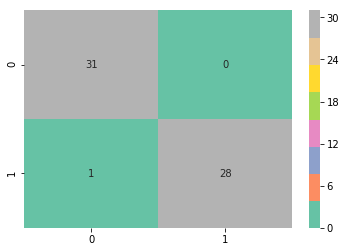

In [19]:
# plot the validation confusion matrix
cm = confusion_matrix(yy_test, yy_pred_classes)
sns.heatmap(cm,
            annot=True,
            cmap="Set2")
plt.show()